In [377]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

# Practica

## Ejercicio 1:  

Se le brinda un dataset con registros históricos de créditos otorgados y su categorización, "good" o "bad". Su objetivo es brindar un modelo que ayude a predecir si el créditos será "good" o "bad". Para ello ud debe de implementar algún algoritmo de ML visto en clase, y justificar la elección del algoritmo.

    Variables independientes:
    Status of existing checking account, in Deutsche Mark.
    Duration in months
    Credit history (credits taken, paid back duly, delays, critical accounts) Purpose of the credit (car, television,...)
    Credit amount
    Status of savings account/bonds, in Deutsche Mark.
    Present employment, in number of years.
    Installment rate in percentage of disposable income
    Personal status (married, single,...) and sex
    Other debtors / guarantors
    Present residence since X years
    Property (e.g. real estate)
    Age in years
    Other installment plans (banks, stores)
    Housing (rent, own,...)
    Number of existing credits at this bank
    Job
    Number of people being liable to provide maintenance for Telephone (yes,no)
    Foreign worker (yes,no)



In [378]:
# leer dataset_31_credit-g.csv
creditos = pd.read_csv('dataset_31_credit-g.csv')
creditos

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [379]:
creditos.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### EDA

In [380]:
# buscar valores invalidos
print(creditos.isna().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [381]:
# datos numericos
creditos.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [384]:
# revisar datos en columnas categoricas

display(creditos.describe(include=['O']))

for col in creditos.columns: 
    if creditos[col].dtype == 'object':
        print('-----', col, '-----')
        print(creditos[col].value_counts(), '\n')


,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,'<100','1<=X<4','male single',none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


----- checking_status -----
'no checking'    394
'<0'             274
'0<=X<200'       269
'>=200'           63
Name: checking_status, dtype: int64 

----- credit_history -----
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: credit_history, dtype: int64 

----- purpose -----
radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9
Name: purpose, dtype: int64 

----- savings_status -----
'<100'                603
'no known savings'    183
'100<=X<500'          103
'500<=X<1000'          63
'>=1000'               48
Name: savings_status, dtype: int64 

----- employment -----
'1<=X<4'      339
'>=7'         253
'4<

La gran mayoría de datos son categóricos, se deberá convertir a dummies para trabajarlos con sklearn, no observamos valores nulos por lo que no es necesario rellenar valores o eliminar filas.

### Creación de los modelos

In [387]:
from sklearn.feature_selection import SelectKBest, RFECV, RFE
from sklearn.feature_selection import chi2

# para entender mejor el modelo cambiamos class a valores True y False
creditos['classmap'] = creditos['class'].map({'good': True, 'bad': False})

# datos de prueba y entrenamiento para los modelos
X = creditos.drop(['class', 'classmap'], axis=1)
y = creditos['class']

# la mayoria de las variables son categoricas, por lo que se convierten a numeros
X = pd.get_dummies(X)
print('en total tenemos ', X.shape[1], 'variables numericas')

# # existen demasiadas variables categoricas, por lo que se eliminan mediante una prueba chi2, dejaremos las 15 mejores
sel = SelectKBest(chi2, k=20)
sel.fit_transform(X, y)

X = X[X.columns[sel.get_support()]]

print('luego de la prueba chi2 solo dejamos: ', X.shape[1])
display(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# estandarizacion de features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

en total tenemos  61 variables numericas
luego de la prueba chi2 solo dejamos:  20


,duration,credit_amount,age,checking_status_'0<=X<200',checking_status_'<0',checking_status_'no checking',credit_history_'all paid',credit_history_'critical/other existing credit',credit_history_'no credits/all paid',purpose_'new car',purpose_'used car',purpose_radio/tv,savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'<1',property_magnitude_'no known property',property_magnitude_'real estate',other_payment_plans_bank,housing_rent
0,6,1169,67,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,48,5951,22,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,12,2096,49,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,42,7882,45,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,24,4870,53,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,31,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
996,30,3857,40,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
997,12,804,38,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
998,45,1845,23,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


Classification report
               precision    recall  f1-score   support

         bad       0.73      0.39      0.51        90
        good       0.78      0.94      0.85       210

    accuracy                           0.77       300
   macro avg       0.76      0.66      0.68       300
weighted avg       0.77      0.77      0.75       300

accuracy_score: 0.7733333333333333
Confusion matrix:
 [[ 35  55]
 [ 13 197]]
                                                        0
purpose_'used car'                               0.324767
checking_status_'no checking'                    0.298709
credit_history_'critical/other existing credit'  0.255729
savings_status_'no known savings'                0.142558
age                                              0.125515
property_magnitude_'real estate'                 0.114093
savings_status_'>=1000'                          0.072850
purpose_radio/tv                                 0.048892
other_payment_plans_bank                        -0.

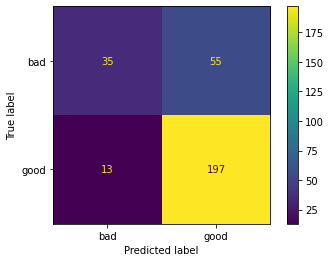

In [388]:
# Modelo LogisticRegression

# entrenamiento
clf = LogisticRegression()
clf.fit(X_train, y_train)

# metricas
predicted = clf.predict(X_test)
print('Classification report\n', metrics.classification_report(y_test, predicted))
print('accuracy_score:', metrics.accuracy_score(y_test, predicted))
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, predicted))
clf.coef_

coeficientes = pd.DataFrame(clf.coef_[0], X.columns)
print(coeficientes.sort_values(0, ascending=False))

cm = metrics.confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()



mejor k: {'n_neighbors': 6}
Classification report
               precision    recall  f1-score   support

         bad       0.54      0.41      0.47        90
        good       0.77      0.85      0.81       210

    accuracy                           0.72       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.70      0.72      0.70       300

accuracy_score: 0.7166666666666667
Confusion matrix:



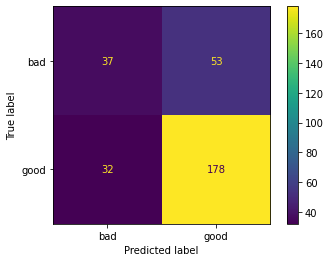

In [389]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="bad")

# Modelado KNN

# tuneado de hyperparametros
param_grid = {'n_neighbors': range(1, 50)}
clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6, scoring=f1_scorer)
clf.fit(X_train, y_train)
print('mejor k:', clf.best_params_)

# metricas
predicted = clf.predict(X_test)
print('Classification report\n', metrics.classification_report(y_test, predicted))
print('accuracy_score:', metrics.accuracy_score(y_test, predicted))

print('Confusion matrix:\n')
cm = metrics.confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


mejores parametros: {'criterion': 'gini', 'max_depth': 46}
Classification report
               precision    recall  f1-score   support

         bad       0.57      0.57      0.57        90
        good       0.81      0.81      0.81       210

    accuracy                           0.74       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.74      0.74      0.74       300

accuracy_score: 0.74
Confusion matrix:

                                                        0
credit_amount                                    0.260371
duration                                         0.152968
age                                              0.152944
checking_status_'no checking'                    0.099385
other_payment_plans_bank                         0.047452
credit_history_'all paid'                        0.033531
credit_history_'critical/other existing credit'  0.033243
property_magnitude_'no known property'           0.028484
purpose_'used car'           

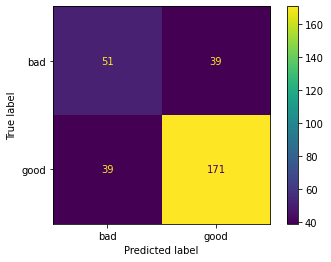

In [390]:
# Modelo Decision Tree

f1_scorer = make_scorer(f1_score, pos_label="bad")

# tuneado de hyperparametros
param_grid = {'max_depth': range(1, 50), 'criterion': ['gini', 'entropy']}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=6, scoring=f1_scorer)
clf.fit(X_train, y_train)
print('mejores parametros:', clf.best_params_)

predicted = clf.predict(X_test)
print('Classification report\n', metrics.classification_report(y_test, predicted))
print('accuracy_score:', metrics.accuracy_score(y_test, predicted))

print('Confusion matrix:\n')
cm = metrics.confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

clf.best_estimator_.feature_importances_
importancias = pd.DataFrame(clf.best_estimator_.feature_importances_, X.columns)
print(importancias.sort_values(0, ascending=False))

### Elección del algoritmo y justificación:


El modelo elegido es **DecisionTree** por dos motivos:

* Cuenta con un accuracy de 0.74 que es aceptablemente bueno.
* Si bien no es el mejor de todos, presenta una mejor detección de las etiquetas "bad", detectando 51 de los 90 casos en los datos de prueba.
* Para su implementación en una entidad financiera, prevenirá en mejor medida la pérdida de dinero.


### Ejercicio 2:

Con base al dataset anterior, determine cuál de las variables es la que mayor significancia tiene para que un crédito sea "good".


**Respuesta:**

Con base en las metricas de los modelos, vemos el siguiente set de datos:

    credit_amount                                    0.260371
    duration                                         0.152968
    age                                              0.152944
    checking_status_'no checking'                    0.099385
    other_payment_plans_bank                         0.047452
    credit_history_'all paid'                        0.033531
    credit_history_'critical/other existing credit'  0.033243
    property_magnitude_'no known property'           0.028484
    purpose_'used car'                               0.026651
    checking_status_'0<=X<200'                       0.021809
    savings_status_'<100'                            0.020175
    purpose_radio/tv                                 0.020006
    purpose_'new car'                                0.019999
    savings_status_'no known savings'                0.016302
    property_magnitude_'real estate'                 0.014468
    credit_history_'no credits/all paid'             0.014149
    savings_status_'>=1000'                          0.012085
    housing_rent                                     0.011332
    employment_'<1'                                  0.009203
    checking_status_'<0'                             0.005442


Por lo que deducimos que las variables que mas influyen son: credit_amount, duration, age, checking_status y other_payment_plans.